In [3]:
print('Name: ')
print('Clean the data and then plot a heatmap which displays the extereme UVB value throughout the day of every month in 2015 in northern taiwan')
print('Then plot a heatmap which displays amount of Carbon monoxide release throughout the day every of month in 2015 in northern taiwan')
print('Then plot a heatmap which displays amount of sulfur dioxide release throughout the day every of month in 2015 in northern taiwan')
print('Plot both Corbon monoxide and sulfure dioxide plots beside each other to compare and find which month during which time had the most clean air in northern taiwan')

Name: 
Clean the data and then plot a heatmap which displays the extereme UVB value throughout the day of every month in 2015 in northern taiwan
Then plot a heatmap which displays amount of Carbon monoxide release throughout the day every of month in 2015 in northern taiwan
Then plot a heatmap which displays amount of sulfur dioxide release throughout the day every of month in 2015 in northern taiwan
Plot both Corbon monoxide and sulfure dioxide plots beside each other to compare and find which month during which time had the most clean air in northern taiwan


# Activity 1- Plot a heatmap to show maximum UVB value throughout various different times of the day

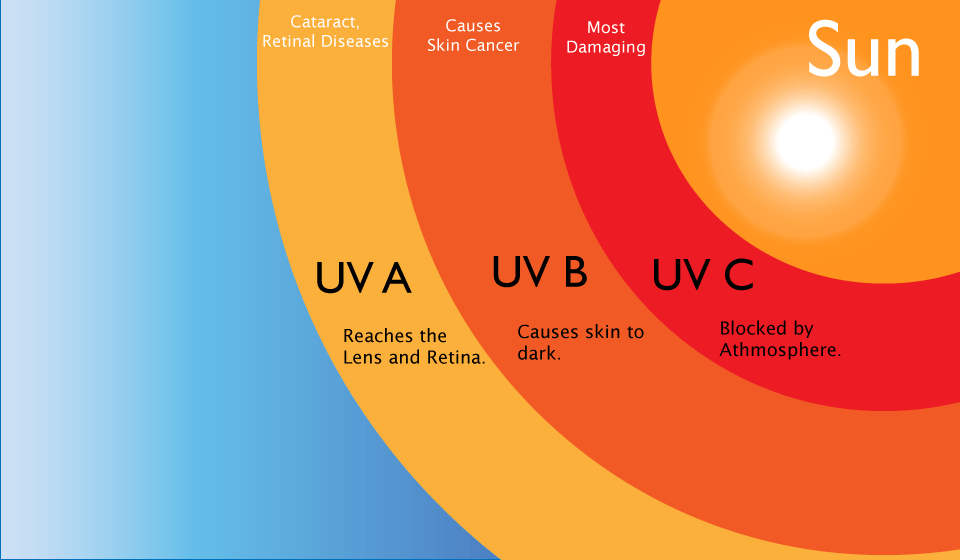

In [4]:
#predefine code for image
from IPython.display import Image
Image(filename='UV.png') 
#predefine code end

In [5]:
# Import all the libraries and read 2015_Air_quality_in_northern_Taiwan.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

dataframe = pd.read_csv('2015_Air_quality_in_northern_Taiwan.csv')
dataframe

ModuleNotFoundError: No module named 'pandas'

In [25]:
# Create a new column which displays the month and time extracted from the time column
dataframe['month'] = pd.DatetimeIndex(dataframe['time']).month
dataframe['time_hours'] = pd.DatetimeIndex(dataframe['time']).time

dataframe


,time,station,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,...,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,month,time_hours
0,2015/01/01 00:00,Banqiao,16,2.1,0.79,0.14,1.2,16,17,37,...,57,12,2.2,0,69,69,4.7,4.2,1,00:00:00
1,2015/01/01 01:00,Banqiao,16,2.1,0.8,0.15,1.3,16,17,36,...,57,11,2.2,0,67,65,4,4,1,01:00:00
2,2015/01/01 02:00,Banqiao,16,2.1,0.71,0.13,1,13,14,38,...,57,8,2.2,0,63,53,3.7,3.5,1,02:00:00
3,2015/01/01 03:00,Banqiao,15,2,0.66,0.12,0.8,11,12,39,...,58,6.5,2.2,0,63,63,4.1,3.3,1,03:00:00
4,2015/01/01 04:00,Banqiao,15,2,0.53,0.11,0.6,10,11,38,...,58,5.5,2.1,0,69,67,3,3.1,1,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218635,2015/12/31 19:00,Zhongshan,18,1.9,1.05,0.25,6.1,39,45,35,...,67,4.5,2.2,NaN,112,121,3.2,2.3,12,19:00:00
218636,2015/12/31 20:00,Zhongshan,18,1.9,0.96,0.22,5.3,37,42,31,...,69,3.7,2.1,NaN,115,113,2.7,2.3,12,20:00:00
218637,2015/12/31 21:00,Zhongshan,18,1.9,0.82,0.19,4,28,32,34,...,70,3.5,2.1,NaN,113,109,2.6,2.6,12,21:00:00
218638,2015/12/31 22:00,Zhongshan,18,1.9,0.88,0.21,4.5,32,37,27,...,71,4.6,2.1,NaN,116,112,2.4,2.2,12,22:00:00


In [26]:
# Clean the data by replacing the null, 0 and values ending with # to nan values
dataframe.replace( '', float('nan') ,inplace=True)
dataframe.replace( '0', float('nan') ,inplace=True)
dataframe.replace('.#$', float('nan') ,inplace=True, regex=True)
dataframe.replace('.x$', float('nan') ,inplace=True, regex=True)
df = dataframe.dropna()
df

,time,station,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,...,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,month,time_hours
160,2015/01/07 16:00,Banqiao,15,2,0.83,0.27,7.8,30,38,13,...,69,2.1,2.3,0.1,78,71,2,1.9,1,16:00:00
175,2015/01/08 07:00,Banqiao,12,2,0.69,0.19,5.3,22,27,20,...,55,4.8,2.1,0.2,63,56,3,2.4,1,07:00:00
176,2015/01/08 08:00,Banqiao,13,1.9,0.71,0.2,7.7,23,31,20,...,53,5.1,2.1,0.7,65,60,3.2,2.5,1,08:00:00
177,2015/01/08 09:00,Banqiao,13,1.9,0.61,0.18,6.1,21,27,23,...,54,5.2,2.1,1.2,55,53,2.7,2.6,1,09:00:00
178,2015/01/08 10:00,Banqiao,14,1.9,0.65,0.23,8.3,24,33,22,...,52,5.3,2.2,1.7,79,93,2.5,2.3,1,10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,2015/12/31 12:00,Banqiao,17,2,0.64,0.2,3.7,24,28,36,...,59,4.1,2.2,0.8,73,73,3.5,2.7,12,12:00:00
8749,2015/12/31 13:00,Banqiao,17,2,0.66,0.2,3.7,24,27,36,...,59,4.6,2.2,0.8,80,76,2.4,2.4,12,13:00:00
8750,2015/12/31 14:00,Banqiao,17,2,0.71,0.22,4.4,28,32,31,...,60,5,2.2,0.4,77,77,2.4,2.5,12,14:00:00
8751,2015/12/31 15:00,Banqiao,17,2,0.79,0.25,4.7,31,35,28,...,60,5.1,2.2,0.2,82,88,1.7,2.2,12,15:00:00


In [27]:
# Set the type of 'UVB' column to float
df['UVB'] = df['UVB'].astype(float)
df['UVB'].dtypes


<ipython-input-27-06ae4b0fbc43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UVB'] = df['UVB'].astype(float)


dtype('float64')

In [28]:
#groupby the month and time for getting the maximum of UVB value
new_dataframe = df.groupby(['month','time_hours'])['UVB'].max().reset_index()
new_dataframe


,month,time_hours,UVB
0,1,07:00:00,0.3
1,1,08:00:00,1.3
2,1,09:00:00,3.0
3,1,10:00:00,4.4
4,1,11:00:00,5.8
...,...,...,...
138,12,12:00:00,5.0
139,12,13:00:00,3.9
140,12,14:00:00,2.3
141,12,15:00:00,0.9


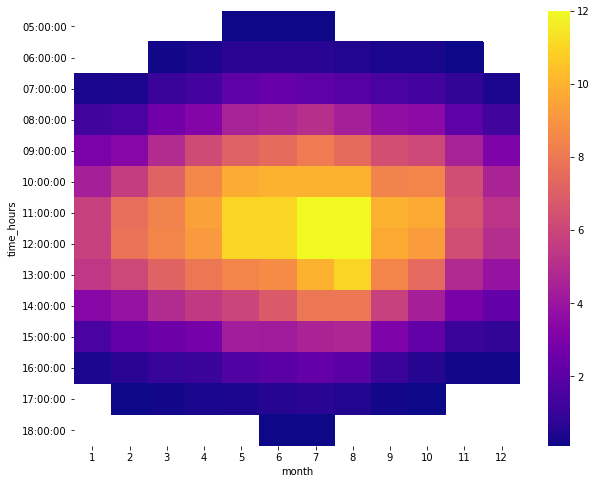

In [29]:
# Plot a heatmap to show the UV value for through various times of the day 

plt.figure(figsize=(10,8))
heatmap_df = pd.pivot_table(values ='UVB', index ='time_hours',  
                    columns ='month', data = new_dataframe)
sns.heatmap(heatmap_df, cmap ='plasma') 


Conclusion - In the month of 5th to 8th (i.e from May to August) at the time between 11 am to 1 pm, the UVB rays can affect people the most and may lead to sun burn and skin cancer.

# Activity 2 Plot a heatmap to show when the air was most clean as per release of Carbon monoxide and Sulfur dioxide at various different times of the day



Carbon monoxide - is a colorless, odorless, and tasteless flammable gas that is slightly less dense than air. It is an toxic air. 

Sulfur dioxide - It is a toxic gas responsible for the smell of burnt matches. 

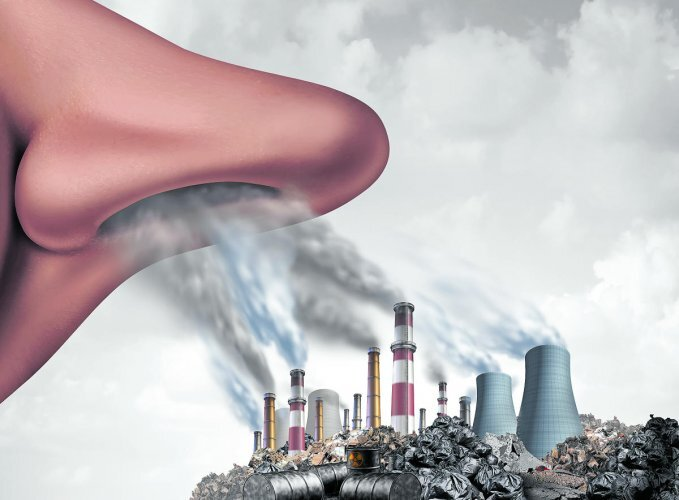

In [1]:
#predefine code for image
from IPython.display import Image
Image(filename='air.jpg') 
#predefine code end

In [2]:
# Clean the data by replacing the null, 0 and values ending with x to nan values
dataframe.replace( '', float('nan') ,inplace=True)
dataframe.replace( '0', float('nan') ,inplace=True)
dataframe.replace('.x$', float('nan') ,inplace=True, regex=True)
df = dataframe.dropna()
df

In [3]:
# Set the type of 'SO2' column to float 
df['SO2'] = df['SO2'].astype(float)
df['SO2'].dtypes

In [4]:
# Set the type of 'CO' column to float 
df['CO'] = df['CO'].astype(float)
df['CO'].dtypes

In [5]:
#Groupby the month and time for getting the maximum of CO and SO2
final_dataframe = df.groupby(['month','time_hours'])['CO','SO2'].max().reset_index()
final_dataframe

In [6]:
# Plot a heatmap to show the the amount of carbon monoxide release through various different times of the day 
plt.figure(figsize=(10,8))
heatmap_df = pd.pivot_table(values ='CO', index ='time_hours',
                    columns ='month', data = final_dataframe)
sns.heatmap(heatmap_df, cmap ='plasma')

Conclusion - In the month of 3th to 7th (i.e from March to July) between 12 pm to 2 pm the air contained least amount of Carbon monoxide

In [7]:
# Plot a heatmap to show the amount Sulfur dioxide released through various different times of the day 
plt.figure(figsize=(10,8))
heatmap_df = pd.pivot_table(values ='SO2', index ='time_hours',
                    columns ='month', data = final_dataframe)
sns.heatmap(heatmap_df, cmap ='plasma')

Conclusion - 

In [8]:
# plot both the amount of carbon monoxide and sulfur dioxide released during different hours of the day
# and find the time and month during which both the gases where at its minimum which is clean air
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

sns.heatmap(heatmap_df, cmap ='plasma', ax=ax1)
ax1.title.set_text('SO2')
sns.heatmap(heatmap_df, cmap ='plasma', ax=ax2)
ax2.title.set_text('CO')

Conclusion -